<a href="https://colab.research.google.com/github/Rusagor/WP/blob/master/16_%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5_%D0%BF%D1%80%D0%B8%D0%BD%D1%86%D0%B8%D0%BF%D1%8B_%D0%9D%D0%A1_%D0%94%D0%9E%D0%9F%D0%9E%D0%9B%D0%9D%D0%98%D0%A2%D0%95%D0%9B%D0%AC%D0%9D%D0%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Conv2D, Input, MaxPool2D, Flatten, Dense
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

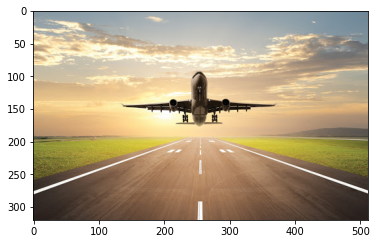

(320, 512, 3)

In [ ]:
img = image.load_img('8.jpg')
plt.imshow(img)
plt.show()
np_img = np.array(img)
np_img.shape

In [ ]:
inp = Input(shape=(320, 512, 3))
x_conv = Conv2D(16, (8,8), activation='relu', padding='same') (inp)
x_max = MaxPool2D(2)(x_conv)

model_conv = Model(inp, x_conv)
model_max = Model(inp, x_max)

In [ ]:
predict_conv = model_conv.predict(np_img[None,...])[0]
predict_max = model_max.predict(np_img[None,...])[0]

In [ ]:
print('Conv shape: ', predict_conv.shape)
print('Max shape: ', predict_max.shape)


Conv shape:  (320, 512, 16)
Max shape:  (160, 256, 16)


In [ ]:
predict_conv[...,0].shape

(320, 512)

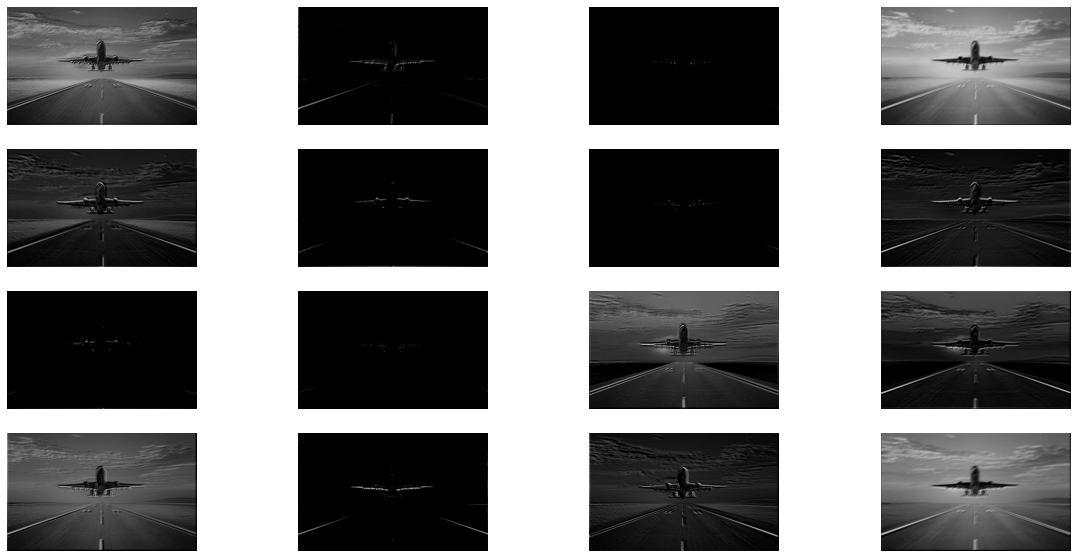

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(20, 10))
for i in range(16):
    axs[i//4, i%4].imshow(predict_conv[...,i], cmap='gray')
    axs[i//4, i%4].axis('off')
plt.show()

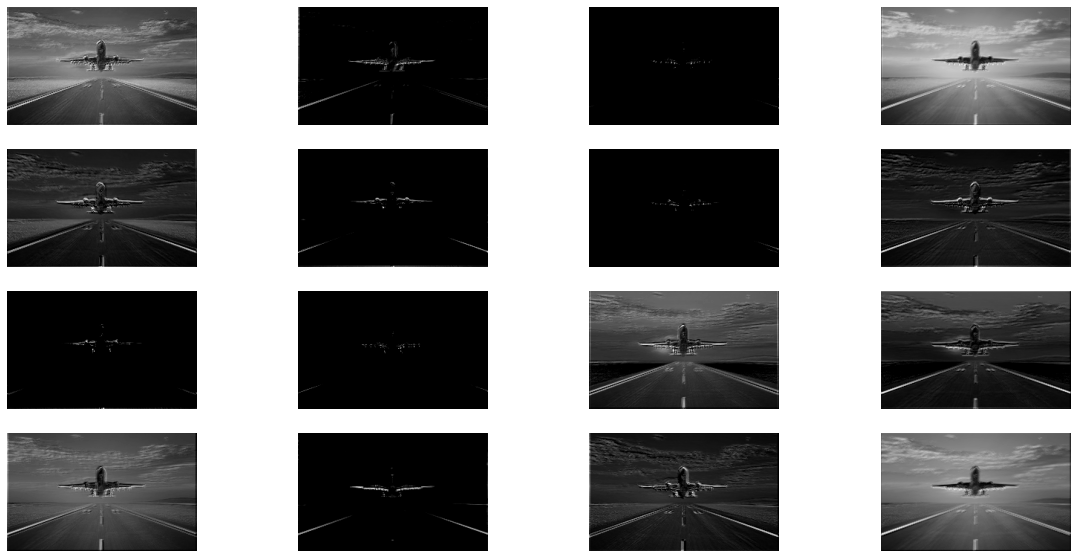

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(20, 10))
for i in range(16):
    axs[i//4, i%4].imshow(predict_max[...,i], cmap='gray')
    axs[i//4, i%4].axis('off')
plt.show()

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train[..., None]
x_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [ ]:
inp = Input(shape=(28,28,1))
x_conv1 = Conv2D(32, (2,2), padding='same', activation='relu') (inp)
x_conv2 = Conv2D(32, (2,2), padding='same', activation='relu') (x_conv1)
x_maxP = MaxPool2D(2) (x_conv2)

x_conv3 = Conv2D(64, (2,2), padding='same', activation='relu') (x_maxP)
x_conv4 = Conv2D(64, (2,2), padding='same', activation='relu') (x_conv3)
x_maxP2 = MaxPool2D(2) (x_conv4)

xFl = Flatten() (x_maxP2)
out = Dense(128, activation = 'relu') (xFl)
out = Dense(10, activation = 'softmax') (out)

In [ ]:
model_full = Model(inp, out)
model_full.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_full.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)         

In [ ]:
model_full.fit(x_train, y_train, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 4s 17ms/step - loss: 0.4984 - accuracy: 0.9192
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0520 - accuracy: 0.9839
Epoch 3/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0345 - accuracy: 0.9888
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0250 - accuracy: 0.9922
Epoch 5/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0165 - accuracy: 0.9946
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0158 - accuracy: 0.9946
Epoch 7/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0114 - accuracy: 0.9962
Epoch 8/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0099 - accuracy: 0.9967
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0098 - accuracy: 0.9967
Epoch 10/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0104 - accura

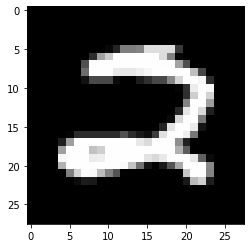

In [ ]:
n = np.random.randint(0,x_train.shape[0])
test = x_train[n]
plt.imshow(test[...,0], cmap='gray')
plt.show()

In [ ]:
# Первый сверточный слой
model1 = Model(inp, x_conv1)
model1.set_weights(model_full.get_weights()[:2])

In [ ]:
predict1 = model1.predict(test[None,...])[0]
predict1.shape

(28, 28, 32)

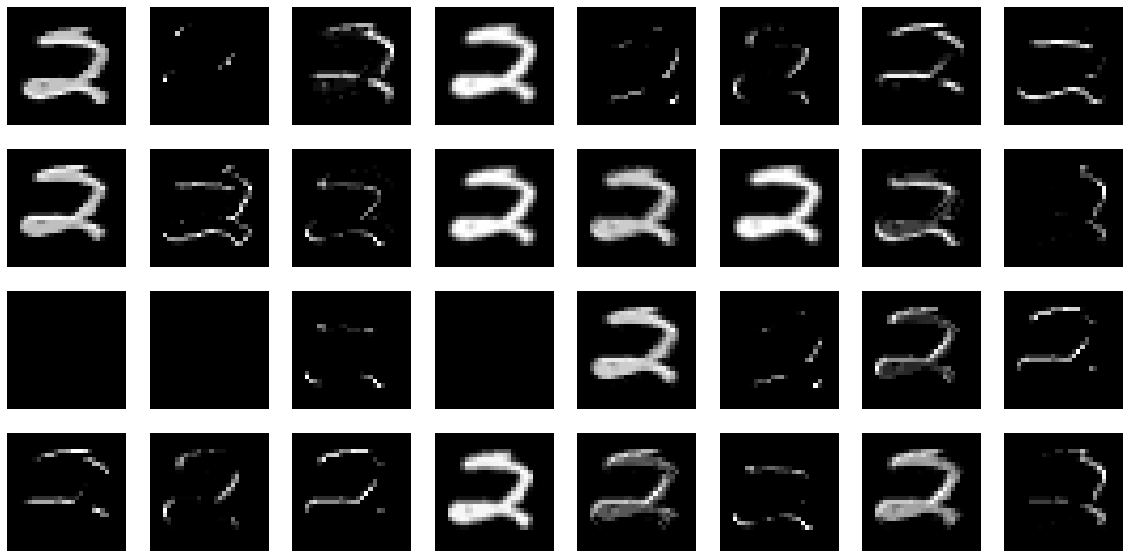

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(20, 10))
for i in range(32):  
    axs[i//8, i%8].imshow(predict1[...,i], cmap='gray')
    axs[i//8, i%8].axis('off')
plt.show()

In [ ]:
# Второй сверточный слой
model2 = Model(inp, x_conv2)
model2.set_weights(model_full.get_weights()[:4])

In [ ]:
predict2 = model2.predict(test[None,...])[0]
predict2.shape

(28, 28, 32)

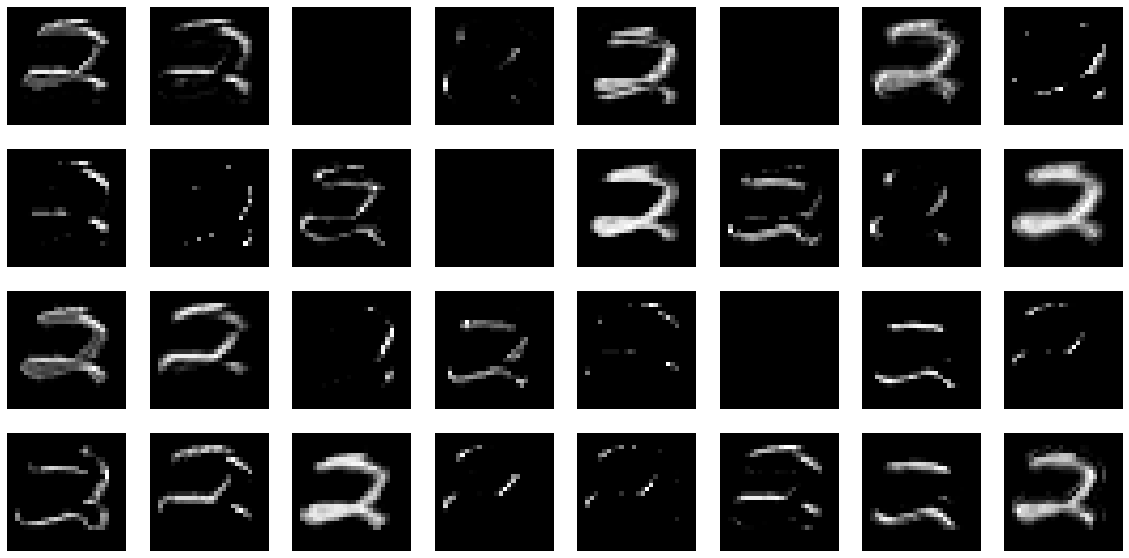

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(20, 10))
for i in range(32):  
    axs[i//8, i%8].imshow(predict2[...,i], cmap='gray')
    axs[i//8, i%8].axis('off')
plt.show()

In [ ]:
# Первый МаксПуллинг
model3 = Model(inp, x_maxP)
model3.set_weights(model_full.get_weights()[:4])

In [ ]:
predict3 = model3.predict(test[None,...])[0]
predict3.shape

(14, 14, 32)

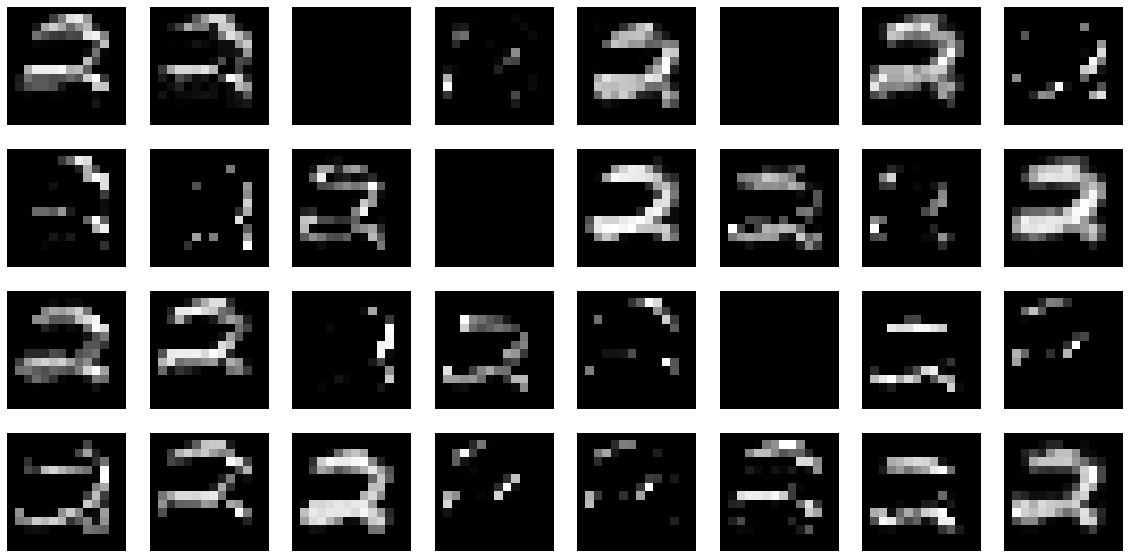

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(20, 10))
for i in range(32):  
    axs[i//8, i%8].imshow(predict3[...,i], cmap='gray')
    axs[i//8, i%8].axis('off')
plt.show()

In [ ]:
# Третий сверточный слой
model4 = Model(inp, x_conv3)
model4.set_weights(model_full.get_weights()[:6])

In [ ]:
predict4 = model4.predict(test[None,...])[0]
predict4.shape

(14, 14, 64)

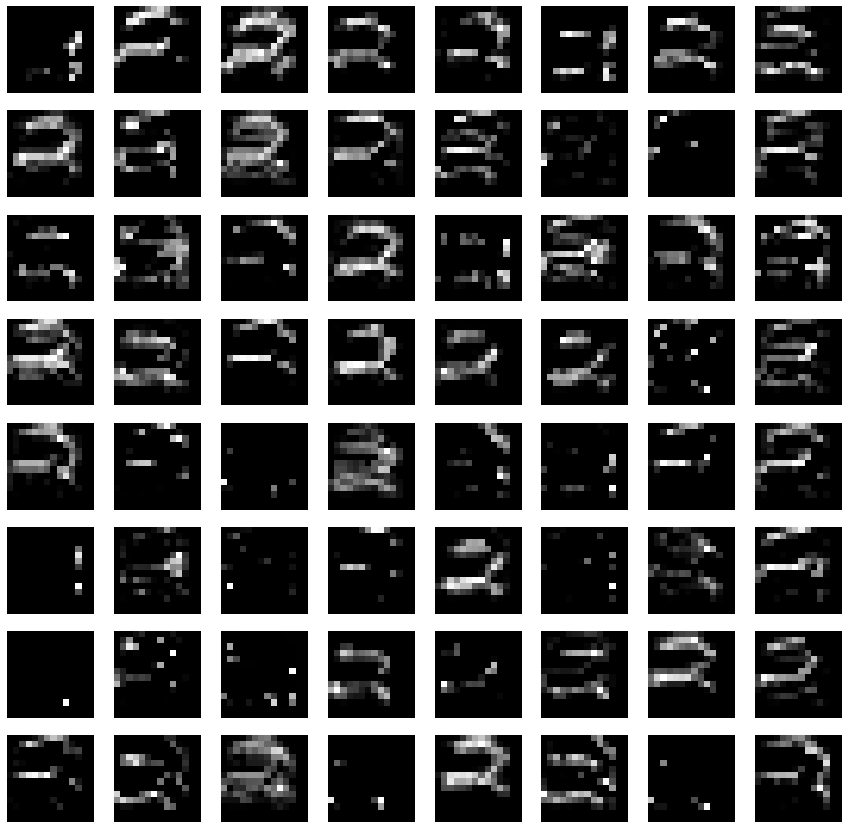

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(15, 15))
for i in range(64):  
    axs[i//8, i%8].imshow(predict4[...,i], cmap='gray')
    axs[i//8, i%8].axis('off')
plt.show()

In [ ]:
# Пятый сверточный слой
model5 = Model(inp, x_conv4)
model5.set_weights(model_full.get_weights()[:8])

In [ ]:
predict5 = model5.predict(test[None,...])[0]
predict5.shape

(14, 14, 64)

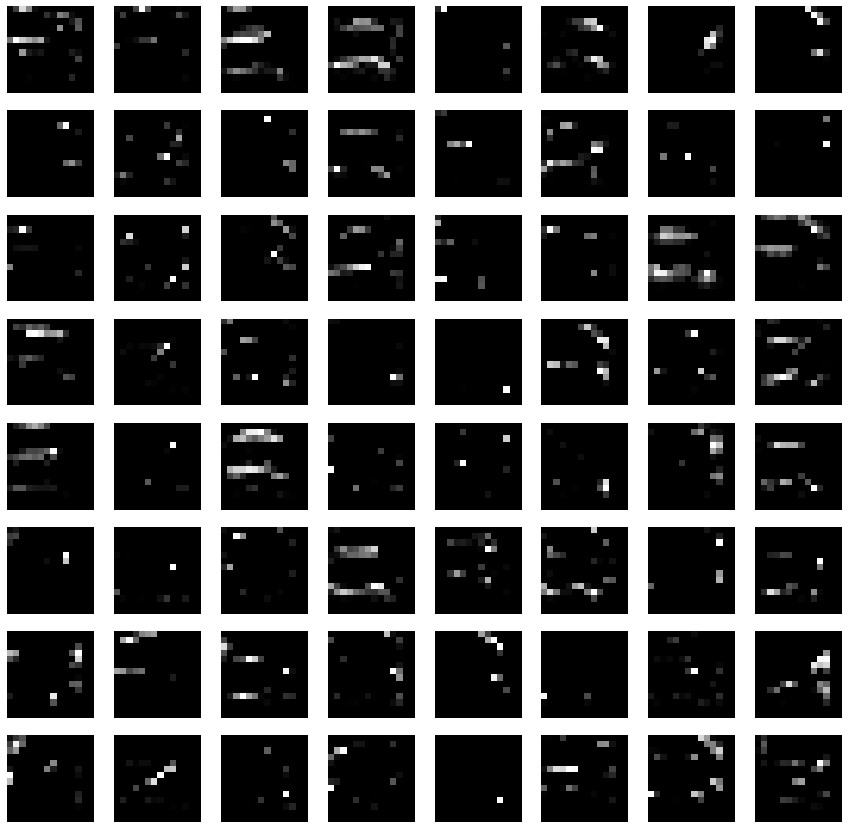

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(15, 15))
for i in range(64):  
    axs[i//8, i%8].imshow(predict5[...,i], cmap='gray')
    axs[i//8, i%8].axis('off')
plt.show()

In [ ]:
# Второй МаксПуллинг
model6 = Model(inp, x_maxP2)
model6.set_weights(model_full.get_weights()[:8])

In [ ]:
predict6 = model6.predict(test[None,...])[0]
predict6.shape

(7, 7, 64)

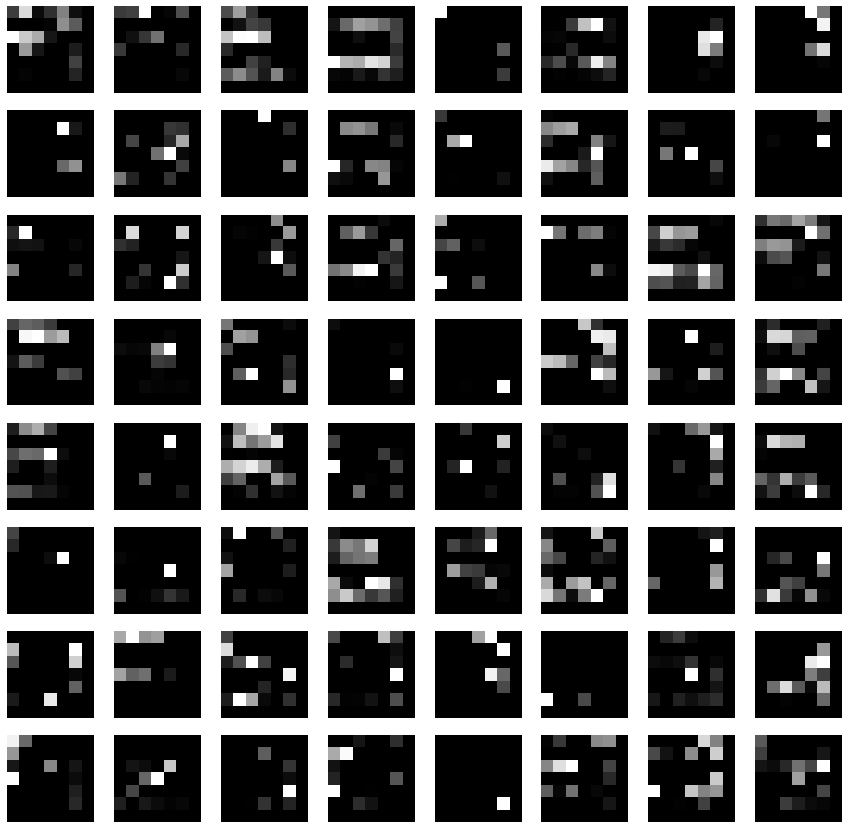

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(15, 15))
for i in range(64):  
    axs[i//8, i%8].imshow(predict6[...,i], cmap='gray')
    axs[i//8, i%8].axis('off')
plt.show()